# K Means Clustering


K Means Clustering é um algoritmo de aprendizagem não supervisionado que tenta agrupar dados com base em sua similaridade. 

Aprendizagem não supervisionada significa que não há resultado a ser previsto e o algoritmo apenas tenta encontrar padrões nos dados. 

Em k means clustering, temos que especificar o número de clusters em que queremos que os dados sejam agrupados.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/800px-K_Means_Example_Step_1.svg.png" width="200" height="100"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/800px-K_Means_Example_Step_2.svg.png" width="200" height="100"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/800px-K_Means_Example_Step_3.svg.png" width="200" height="100"/>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/800px-K_Means_Example_Step_4.svg.png" width="200" height="100"/>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from plotnine import *

In [8]:
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")
df = df[['sepal_length','sepal_width','petal_length','petal_width']]

In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


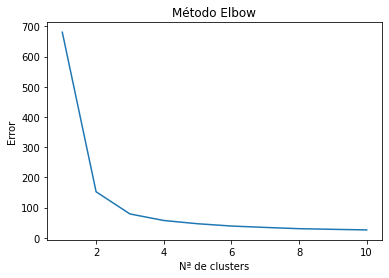

In [9]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(df)
    kmeans.fit(df)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Método Elbow')
plt.xlabel('Nª de clusters')
plt.ylabel('Error')
plt.show()

In [21]:
kmeans.cluster_centers_.ravel()

array([6.02777778, 2.73333333, 5.02777778, 1.79444444, 4.69      ,
       3.085     , 1.385     , 0.19      , 6.61666667, 3.07916667,
       5.5625    , 2.1375    , 5.        , 2.3       , 3.275     ,
       1.025     , 5.52857143, 4.04285714, 1.47142857, 0.28571429,
       7.54      , 3.15      , 6.39      , 2.09      , 6.43      ,
       2.94      , 4.59      , 1.435     , 5.12173913, 3.5173913 ,
       1.53043478, 0.27826087, 5.54166667, 2.83333333, 4.275     ,
       1.375     , 5.7       , 2.55      , 3.875     , 1.15      ])

In [4]:
y_kmeans = KMeans(n_clusters = 3).fit_predict(df)

In [11]:
df['cluster'] = y_kmeans
df

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
df.groupby('cluster').describe().T

cluster                     0          1          2
sepal_length count  62.000000  50.000000  38.000000
             mean    5.901613   5.006000   6.850000
             std     0.466410   0.352490   0.494155
             min     4.900000   4.300000   6.100000
             25%     5.600000   4.800000   6.425000
             50%     5.900000   5.000000   6.700000
             75%     6.200000   5.200000   7.200000
             max     7.000000   5.800000   7.900000
sepal_width  count  62.000000  50.000000  38.000000
             mean    2.748387   3.418000   3.073684
             std     0.296284   0.381024   0.290092
             min     2.000000   2.300000   2.500000
             25%     2.500000   3.125000   2.925000
             50%     2.800000   3.400000   3.000000
             75%     3.000000   3.675000   3.200000
             max     3.400000   4.400000   3.800000
petal_length count  62.000000  50.000000  38.000000
             mean    4.393548   1.464000   5.742105
             std     0.508895   0.173511   0.488590
             min     3.000000   1.000000   4.900000
             25%     4.025000   1.400000   5.425000
             50%     4.500000   1.500000   5.650000
             75%     4.800000   1.575000   6.000000
             max     5.100000   1.900000   6.900000
petal_width  count  62.000000  50.000000  38.000000
             mean    1.433871   0.244000   2.071053
             std     0.297500   0.107210   0.279872
             min     1.000000   0.100000   1.400000
             25%     1.300000   0.200000   1.825000
             50%     1.400000   0.200000   2.100000
             75%     1.575000   0.300000   2.300000
             max     2.400000   0.600000   2.500000

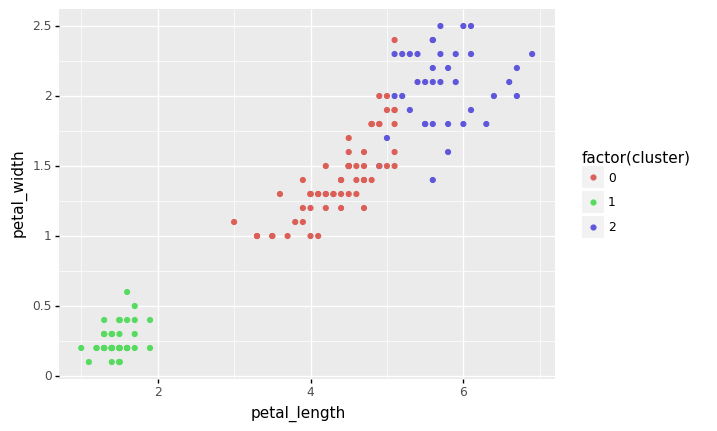

<ggplot: (165968216473)>

In [12]:
(ggplot(df, aes('petal_length', 'petal_width', color='factor(cluster)'))
 + geom_point())